In [1]:
#Encoddage
#Normalisation : MinMax ou Standardscaler (sensible aux valeurs abérantes = outliers)--> utiliser robustscaler

In [2]:
import pandas as pd
data = pd.read_csv('cardio_train.csv',sep=';', index_col=0)

In [3]:
20228/365

55.41917808219178

In [4]:
#for i in data.age:
#    i = i/365
#    data.age = i
#    print(i)

In [38]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [33]:
round(data.ap_hi.mean())

129

In [16]:
data.isnull().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [17]:
data.shape

(70000, 12)

In [34]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
#for i in data.ap_lo:
#    if i > 200:
#        print(i)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>],
       [<AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'cardio'}>]], dtype=object)

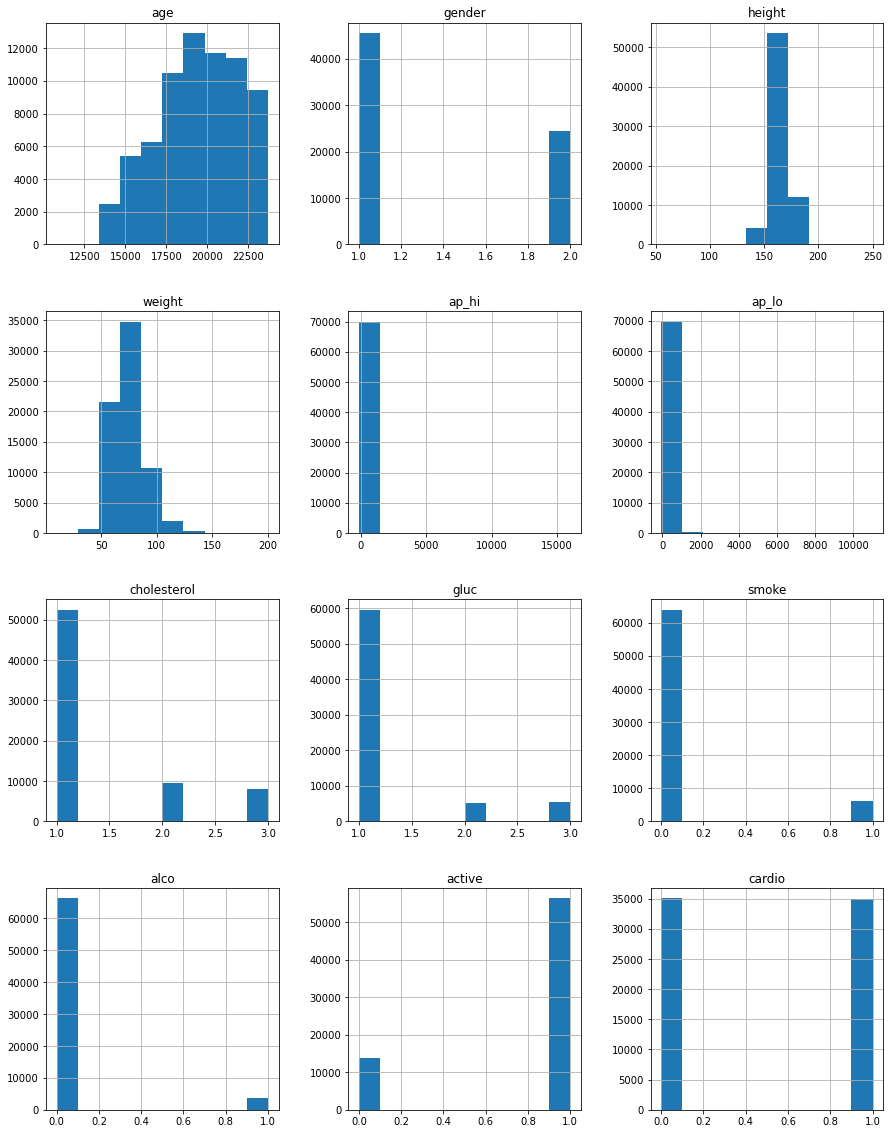

In [78]:
data.hist(figsize=(15,20))

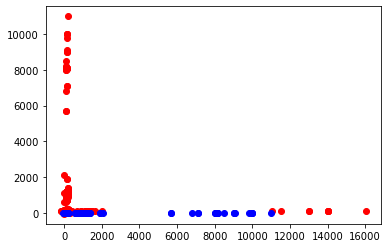

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

a = data.ap_hi
b = data.ap_lo
o = data.gender

plt.scatter(a, b, c = 'red')
plt.scatter(b, o, c = 'blue')

#sns.pairplot(data)

In [22]:
y = data.cardio
X = data.drop(['cardio'], axis=1)

In [23]:
print('X shape : ',X.shape)
print('y shape : ',y.shape)

X shape :  (70000, 11)
y shape :  (70000,)


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.58807588, 1.        , 0.57948718, ..., 0.        , 0.        ,
        1.        ],
       [0.73015873, 0.        , 0.51794872, ..., 0.        , 0.        ,
        1.        ],
       [0.6240031 , 0.        , 0.56410256, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.64018583, 1.        , 0.65641026, ..., 0.        , 1.        ,
        0.        ],
       [0.90073558, 0.        , 0.55384615, ..., 0.        , 0.        ,
        0.        ],
       [0.75431669, 0.        , 0.58974359, ..., 0.        , 0.        ,
        1.        ]])

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Train set: ',X_train.shape)
print('Test set: ',X_test.shape)

Train set:  (46900, 11)
Test set:  (23100, 11)


In [26]:
y_train

id
91821    1
6439     0
34438    1
48898    1
51423    1
        ..
53137    1
8918     1
78302    0
1197     0
22556    0
Name: cardio, Length: 46900, dtype: int64

In [71]:
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [28]:
import time 

start_time = time.time()

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
print('Train score: ', clf.score(X_train,y_train))
print('Test score: ', clf.score(X_test,y_test))
print("--- %s seconds ---" % (time.time() - start_time))

# Le test a été fait avec Robustscaler et il n'y a pas de différence notable sur l'accuracy


Train score:  0.9998294243070363
Test score:  0.718051948051948
--- 7.7724997997283936 seconds ---


In [72]:
# predict et predict proba 
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8417 3089]
 [3424 8170]]


0.718051948051948

## Prédire si cette personne est un sujet à risque : 
Arthur 53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normal 
et un taux de glucose normal, une tension artérielle systolique dans la moyenne
et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données

### Rappel : 
AGE:  integer (number of days)<br>
GENDER: categorical (1: female, 2: male)<br>
HEIGHT: integer (cm) <br>
WEIGHT: integer (kg)<br>
AP_HIGH: systolic blood pressure, integer<br>
AP_LOW: diastolic blood pressure, integer <br>
CHOLESTEROL: categorical (1: normal, 2: above normal, 3: well above normal)<br>
GLUCOSE: categorical (1: normal, 2: above normal, 3: well above normal)<br>
SMOKE: categorical (0: no, 1: yes)<br>
ALCOHOL: categorical (0: no, 1: yes)<br>
PHYSICAL_ACTIVITY: categorical (0: no, 1: yes)<br>


In [70]:
# Concernant Arthur, nous ne savons pas s'il boit de l'alcool ou pas, nous testerons donc les 2 

print("Si Arthur boit, sa proba d'être à risque est de :",clf.predict_proba([[19345,2,175,85,129,90,2,1,1,0,1]]))
print("Si Arthur ne boit pas, sa proba d'être à risque est de :",clf.predict_proba([[19345,2,175,85,129,90,2,1,1,1,1]]))
print("Arthur ferait donc mieux de boire de l'alcool s'il ne veut pas avoir de problèmes cardio xD" )

Si Arthur boit, sa proba d'être à risque est de : [[0.5 0.5]]
Si Arthur ne boit pas, sa proba d'être à risque est de : [[0.55 0.45]]
Arthur ferait donc mieux de boire de l'alcool s'il ne veut pas avoir de problèmes cardio xD


Précisions:<br>
Pour récupérer sa pression diastolique et systolique, nous nous sommes reporté à la methode DESCRIBE de pandas<br>
Conclusion :<br>
Le jeu de données ayant une accuracy à peine aux alentours de 71%, le résultat est totalement biaisais.<br>
Remarque : <br>
Cela est surement dû aux outliers du jeu de donnée/valeurs abérantes sur la diastolique et la systolique.<br>

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid= {'n_estimators': [ 250],
             'max_depth' : [4, 5],
             'n_estimators': [50, 150, 100, 200, 300, 350, 400],
             'min_samples_split': [2, 3, 4],
             'min_samples_leaf': [2, 5],
            'n_jobs': [-1]}


grid = GridSearchCV(RandomForestClassifier(), param_grid,cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 150, 100, 200, 300, 350, 400],
                         'n_jobs': [-1]})

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_